### Importing Libraries

In [20]:
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2

### Loading our trained Model

In [23]:
image_size = 224
target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

batch_size = 32
epochs = 25

In [24]:
base_dir = r"C:\Users\DELL\Downloads\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)"
train_dir = os.path.join(base_dir,"train")
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0,
                                                             shear_range = 0.2,
                                                             zoom_range = 0.2,
                                                             width_shift_range = 0.2,
                                                             height_shift_range = 0.2,
                                                              brightness_range=[0.5, 1.5],
                                                             fill_mode="nearest")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (image_size, image_size),
                                               shuffle=False,
                                               batch_size = batch_size,
                                               class_mode = "categorical")
class_name = list(train_data.class_indices.keys())

Found 70294 images belonging to 38 classes.


In [2]:
model = load_model(r'C:\Users\DELL\Downloads\plant_models\plant_leaf_disease_detection_MobileNet.h5')

#Visualising and Performing Prediction on Single image

File exists at: C:\Users\DELL\Downloads\testing\augmented_images\Apple_Scab\Apple_Apple_Scab(Real pic from dataset).jpg
Image read successfully.


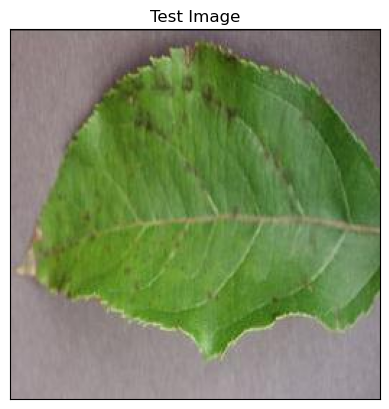

In [9]:
image_path = r'C:\Users\DELL\Downloads\testing\augmented_images\Apple_Scab\Apple_Apple_Scab(Real pic from dataset).jpg'
if os.path.exists(image_path):
    print("File exists at:", image_path)
else:
    print("File not found at:", image_path)

# Read an image in default mode
img = cv2.imread(image_path)

# Check if img is None (i.e., image could not be read)
if img is None:
    print("Error: Unable to read the image.")
else:
    print("Image read successfully.")

# Read an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Display the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model (prediction)

In [13]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(224,224))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

1/1 [==============================] - 1s 542ms/step


In [14]:
print(predictions)

[[1.1775169e-01 5.7935917e-01 5.8665264e-02 4.2005177e-03 8.3094025e-03
  6.8147021e-10 5.2344479e-04 3.8157508e-03 3.6946810e-03 2.9115386e-03
  2.0309228e-02 2.8559500e-05 1.7603010e-06 1.9435844e-05 5.2564992e-03
  1.6930220e-01 2.3468014e-07 1.1326355e-07 5.0669289e-03 2.8235936e-06
  9.9970180e-08 5.3726740e-06 2.1590719e-04 5.4420195e-07 6.7664536e-05
  1.7012249e-07 6.6727720e-05 2.0024667e-02 1.4482887e-05 2.6449223e-08
  2.2865778e-04 1.7314085e-05 1.9108059e-07 5.9366204e-08 3.7370205e-06
  7.3173418e-05 6.3059868e-09 6.1940591e-05]]


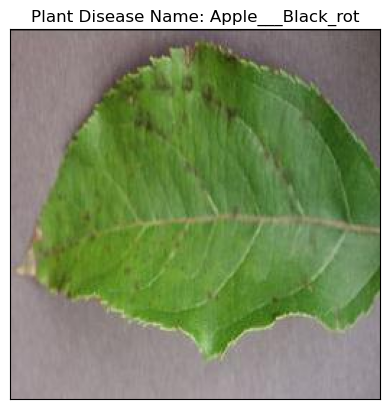

In [27]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Plant Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

1/1 [==============================] - 0s 46ms/step


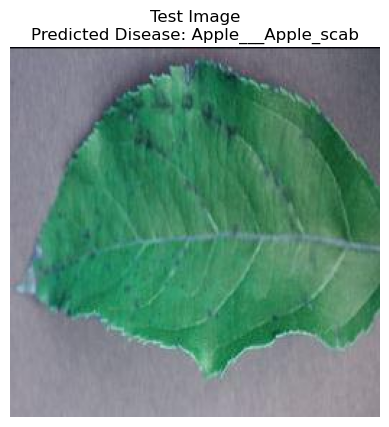

Predicted Disease: Apple___Apple_scab


In [26]:
input_img = cv2.resize(img, (224, 224))
input_img = input_img / 255.0 
input_img = np.expand_dims(input_img, axis=0)

# Make predictions using the model
predictions = model.predict(input_img)
predicted_class_index = np.argmax(predictions)
predicted_class_name = class_name[predicted_class_index]
#to show img and disease name
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Test Image\nPredicted Disease: {}'.format(predicted_class_name))
plt.axis('off')  # Hide axis
plt.show()

print("Predicted Disease:", predicted_class_name)

File exists at: C:\Users\DELL\Downloads\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid\Apple___Cedar_apple_rust\0cd24b0c-0a9d-483f-8734-5c08988e029f___FREC_C.Rust 3762_newPixel25.jpg
Image read successfully.


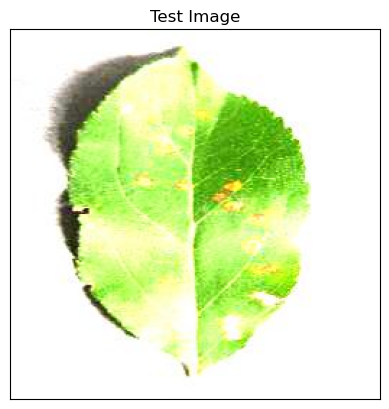

In [28]:
image_path = r'C:\Users\DELL\Downloads\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid\Apple___Cedar_apple_rust\0cd24b0c-0a9d-483f-8734-5c08988e029f___FREC_C.Rust 3762_newPixel25.jpg'
if os.path.exists(image_path):
    print("File exists at:", image_path)
else:
    print("File not found at:", image_path)

# Read an image in default mode
img = cv2.imread(image_path)

# Check if img is None (i.e., image could not be read)
if img is None:
    print("Error: Unable to read the image.")
else:
    print("Image read successfully.")

# Read an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Display the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

1/1 [==============================] - 0s 65ms/step


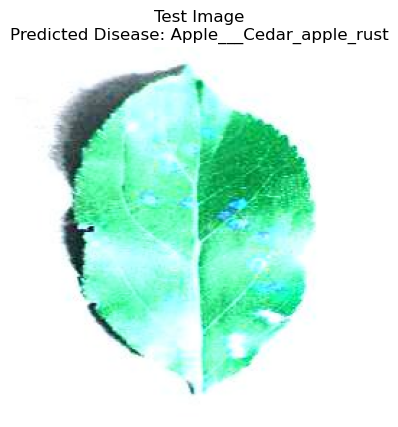

Predicted Disease: Apple___Cedar_apple_rust


In [29]:
input_img = cv2.resize(img, (224, 224))
input_img = input_img / 255.0 
input_img = np.expand_dims(input_img, axis=0)

# Make predictions using the model
predictions = model.predict(input_img)
predicted_class_index = np.argmax(predictions)
predicted_class_name = class_name[predicted_class_index]
#to show img and disease name
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Test Image\nPredicted Disease: {}'.format(predicted_class_name))
plt.axis('off')  # Hide axis
plt.show()

print("Predicted Disease:", predicted_class_name)

File exists at: C:\Users\DELL\Downloads\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid\Potato___Late_blight\1a5f4258-21df-4334-a933-2ef073c932ba___RS_LB 3089.jpg
Image read successfully.


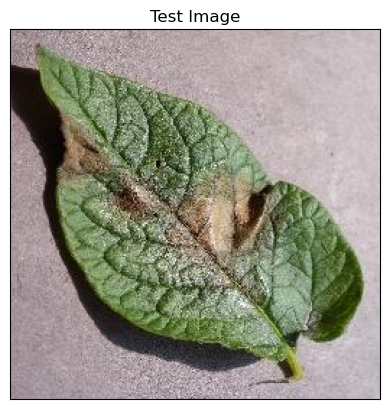

In [30]:
image_path = r'C:\Users\DELL\Downloads\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid\Potato___Late_blight\1a5f4258-21df-4334-a933-2ef073c932ba___RS_LB 3089.jpg'
if os.path.exists(image_path):
    print("File exists at:", image_path)
else:
    print("File not found at:", image_path)

# Read an image in default mode
img = cv2.imread(image_path)

# Check if img is None (i.e., image could not be read)
if img is None:
    print("Error: Unable to read the image.")
else:
    print("Image read successfully.")

# Read an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Display the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

1/1 [==============================] - 0s 66ms/step


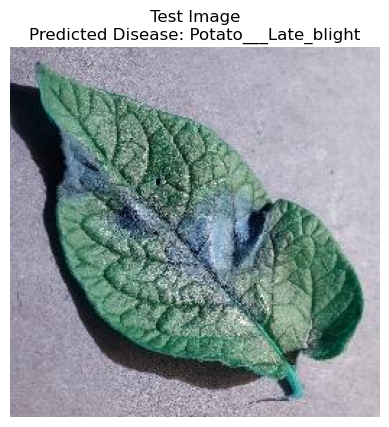

Predicted Disease: Potato___Late_blight


In [31]:
input_img = cv2.resize(img, (224, 224))
input_img = input_img / 255.0 
input_img = np.expand_dims(input_img, axis=0)

# Make predictions using the model
predictions = model.predict(input_img)
predicted_class_index = np.argmax(predictions)
predicted_class_name = class_name[predicted_class_index]
#to show img and disease name
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Test Image\nPredicted Disease: {}'.format(predicted_class_name))
plt.axis('off')  # Hide axis
plt.show()

print("Predicted Disease:", predicted_class_name)